<a href="https://colab.research.google.com/github/barani-bhoopalan/ML-Model-to-predict-Sale-Price/blob/master/End_2_End_ML_Project_Housing_Price_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning Regression Model to predict Housing price** - Supervised Learning Algorithm



The chosen dataset contains the following attributes and the Sale Price being the target variable to predict using regression algorithm

*   SalePrice – the property’s sale price in dollars(target variable).
*   MSSubClass: The building class.
*   LotFrontage: Linear feet of street connected to property.
*   LotArea: Lot size in square feet. Street: Type of road access.
*   Alley: Type of alley access.
*   LLotShape: General shape of property.
*   LandContour: Flatness of the property.
*   LotConfig: Lot configuration.
*   LandSlope: Slope of property. Neighborhood: Physical locations within Ames city limits.
*   Condition1: Proximity to main road or railroad.
*   HouseStyle: Style of dwelling.
*   OverallQual: Overall material and finish quality.
*   OverallCond: Overall condition rating.
*   YearBuilt: Original construction date.


In [0]:
##import main modules
import pandas as pd
import numpy as np


##import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
##Read local file from google colab - upload file to google colab and it is stored in key
from google.colab import files 
uploaded = files.upload()


Saving train.csv to train.csv


In [0]:
##Print the list of files uploaded
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "train.csv" with length 460676 bytes


In [0]:
##read the uploaded CSV using the pandas library
import io
housing = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

In [0]:
# Get column names of the loaded housing dataset
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
# Get the Shape of data
housing.shape

(1460, 81)

In [0]:
# Get the top 5 rows
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##**1. Exploratory Data Analysis**: 

Each row in the dataset represents one house. We can see that we have both numerical (e.g., LotFrontage) and categorical attributes (e.g., LotShape). Also, Id column can be omitted as it is not an useful attribute

In [0]:
##Exclude the id column
housing = housing.drop("Id", axis=1)

##Find the Numerical(non-object) and categorical columns(object)
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [0]:
##Find the Numerical Attribute and spread of values
housing.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.05,24.28,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.69,181.07,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.55,161.32,0.0,0.00,0.0,0.00,1474.0


Illustration:  The 25%, 50%, and 75% columns show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls. For example, 25% of the houses have YearBuilt lower than 1954, while 50% are lower than 1973 and 75% are lower than 2000.

Recall from the statistics lessons that the 25th percentile is also known as the 1st quartile, the 50th percentile is the median, and the 75th percentile is also known as the 3rd quartile.

In [0]:
##Find the Categorical attribute
housing.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


Illustration : For example, we can see that we can have 8 types of HouseStyle, with 1Story houses being the most frequent type.

In [0]:
##Explore Target Variable - SalePrice
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

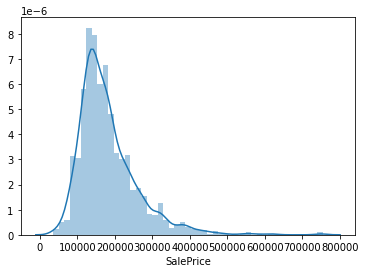

In [0]:
###Distribution plot - target variable - SalePrice
sns.distplot(housing['SalePrice'])

Illustration : The distribution plot tells us that we have a skewed variable. In fact from the statistical summary, we already saw that the mean price is about 181K while 50% of the houses were sold for less than 163K.  Use log transformation to alter the skewness.

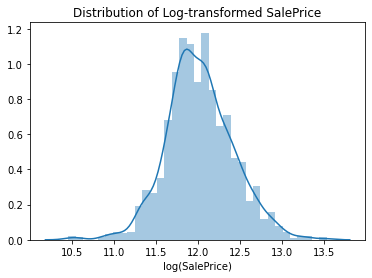

In [0]:
##Log transformation of target variable - SalePrice
sns.distplot(np.log(housing['SalePrice']))
plt.title('Distribution of Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

### A. Distribution Analysis

36


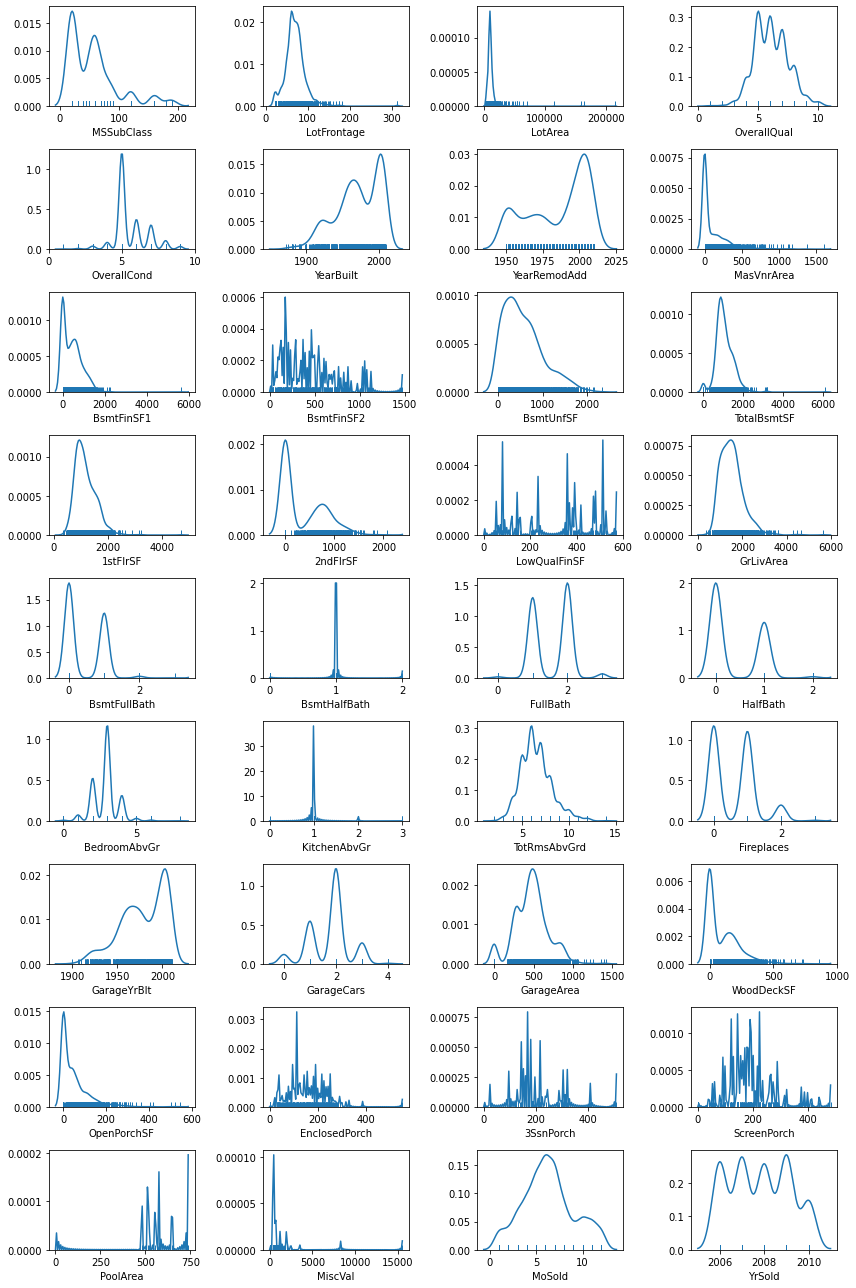

In [0]:
##Distribution of all other numerical variables
num_attributes = housing.select_dtypes(exclude='object').drop(['SalePrice'], axis=1).copy()
print(len(num_attributes.columns))

#Set the complete plot size
fig = plt.figure(figsize=(12,18))

#iterative process to plot all numerical columns (0 to 36)
for i in  (range(len(num_attributes.columns))):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna(), hist = False, rug = True)
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

### B. Outlier Analysis

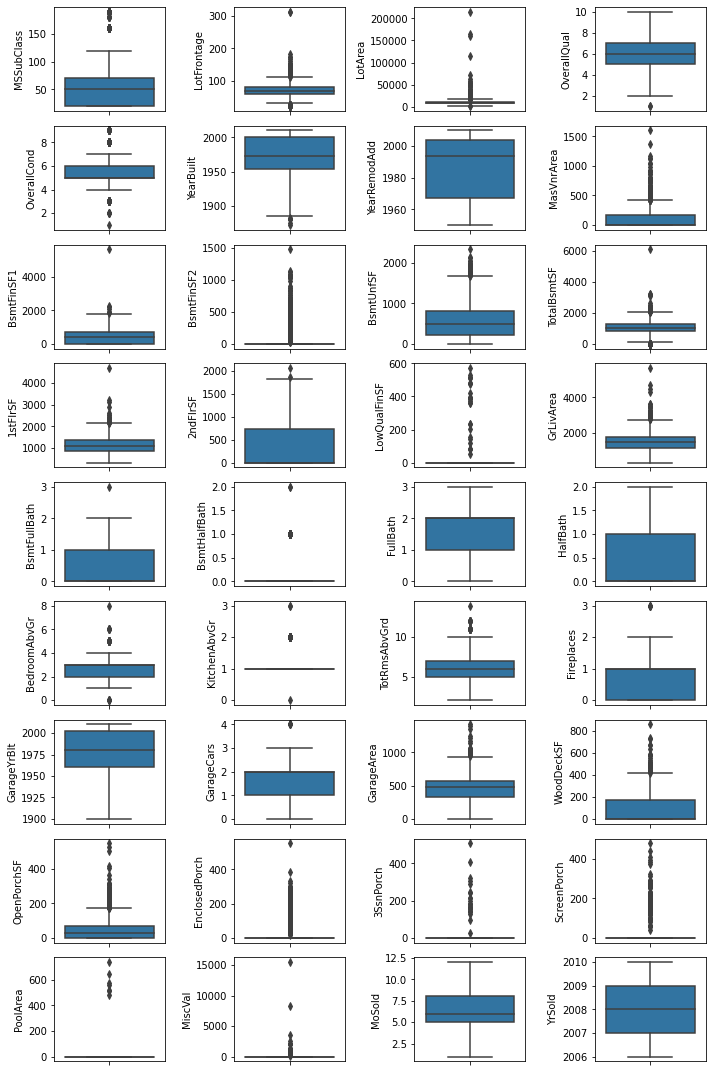

In [0]:
##Find Outliers
fig = plt.figure(figsize=(10,15))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y= num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

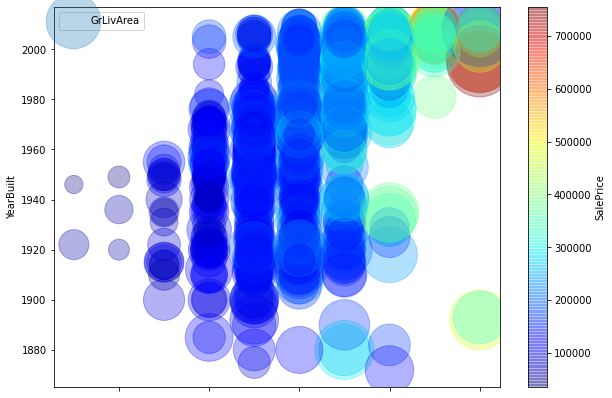

In [0]:
##Visulaization pattern analysis for the - Year Built vs Quality wrt the Living Ground Area
## C-> Color difference based on Sale Price(blue - Low Value && Red - High Value)
## S-> Size of the plot based on Ground-LivingArea (Higher radius - larger Area &&  Lower Radius - Less Area) 
housing.plot(kind='scatter', x="OverallQual", y="YearBuilt", s=housing["GrLivArea"], label="GrLivArea", alpha=0.3, figsize=(10,7),
             c = "SalePrice", cmap = plt.get_cmap("jet"), colorbar=True)

plt.legend()

### C. Correlation Analysis

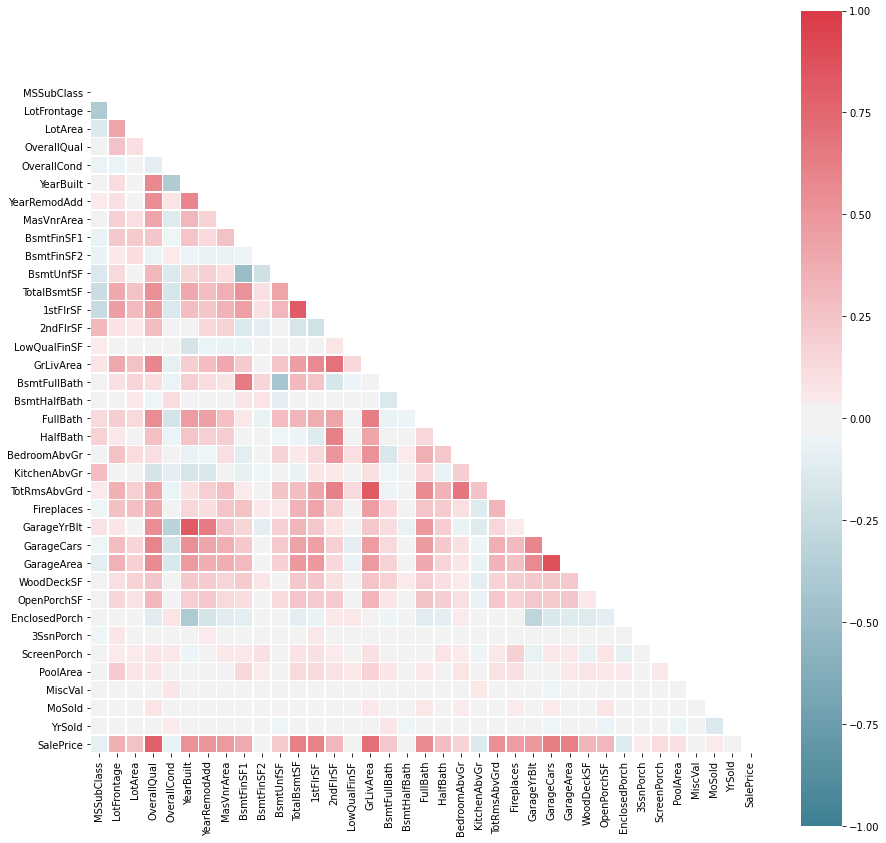

In [0]:
##Find if any variables are highly correlated and remove them for better analysis

##Correlation of numerical attributes
corr = housing.corr()

##Use of MASK to get TRIANGULAR CORRELATION MATRIX
## usually subplot is a tuple containing axes and figure(plot.figure()) 
##   but when taken out seperate;y it can be mentioned like below easy to save as an image
f, ax = plt.subplots(figsize = (15,15))
mask = np.zeros_like(corr , dtype = np.bool) ##return array of zeros with same size as corr
mask[np.triu_indices_from(mask)]= True ##return indices for upper right triangle

## Darker Red - highly correlated and Blue - less correlated 
sns.heatmap(corr, mask = mask, cmap = sns.diverging_palette(220,10, as_cmap = True), square = True, ax = ax, vmin = -1.0, vmax = 1.0, linewidths=.5 )


In [0]:
##From these values, we can see that OverallQual and GrLivArea have the most impact on price,
## while attributes like PoolArea and MoSold are not related to it.
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

##### i - Pair-wise scatter matrix

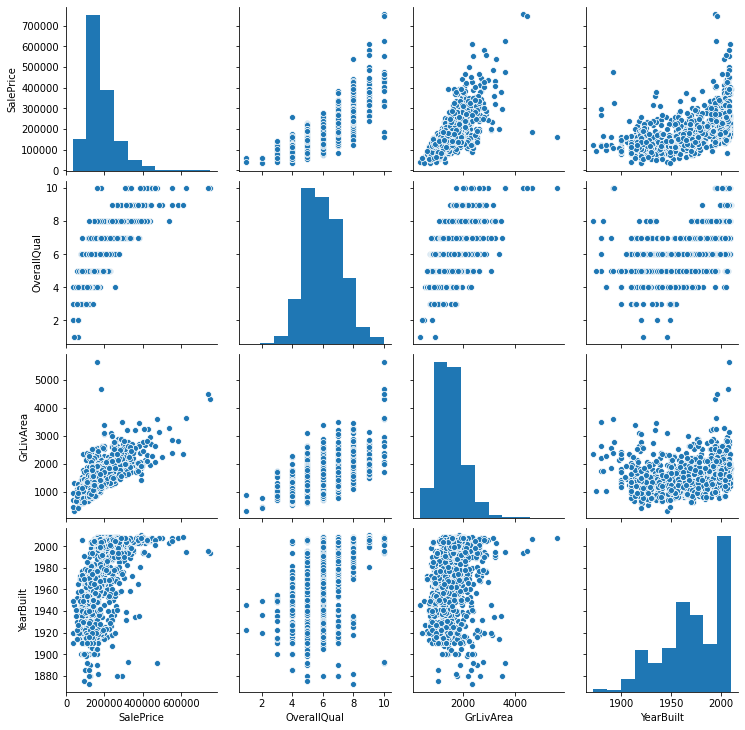

In [0]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
sns.pairplot(housing[col])

##### ii - Box-plot

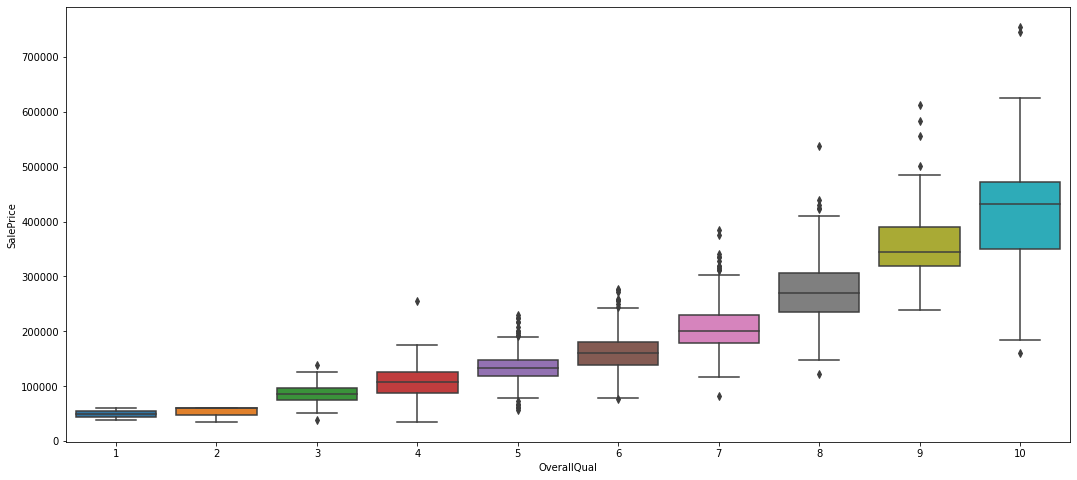

In [0]:
## Boxplot shows - higher the quality then Higer the SalePrice
plt.figure(figsize=(18,8))
sns.boxplot(x= housing.OverallQual, y= housing.SalePrice)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

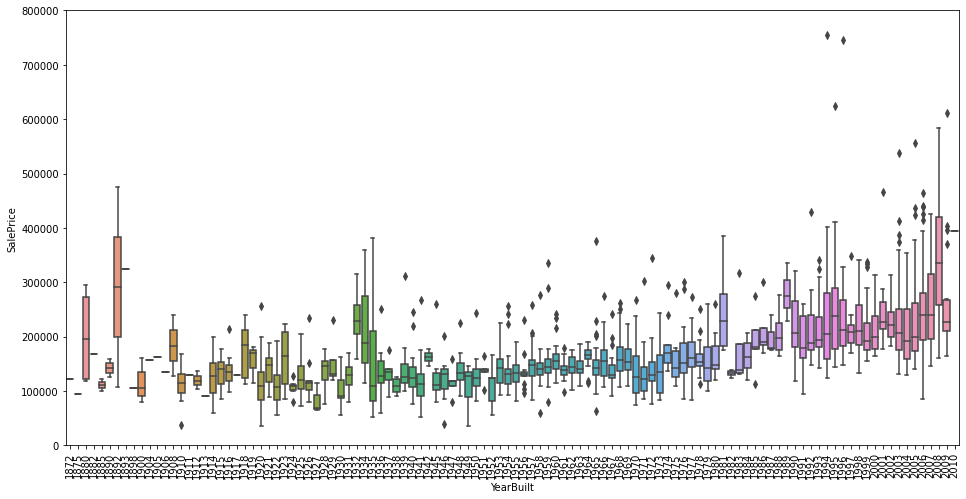

In [0]:
data = pd.concat([housing.SalePrice, housing.YearBuilt], axis = 1)
f, ax = plt.subplots(figsize=(16,8))

## Boxplot will show that very old houses are expensive, but overall the newest houses tend to have higher prices.
fig = sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = data)
fig.axis(ymin=0, ymax=800000)

##Specify rotation for the x labels so it is more readable
plt.xticks(rotation=90)

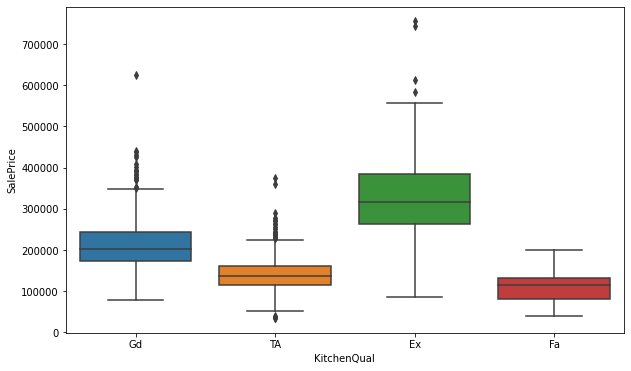

In [0]:
##Categorical Attribute - Find the correlation between KitchenQual and SalePrice

##FRom the boxplot - We can now see that Ex seems to be the more expensive option while Fa brings the prices down.
f,ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=housing.SalePrice, x=housing.KitchenQual)
plt.show()

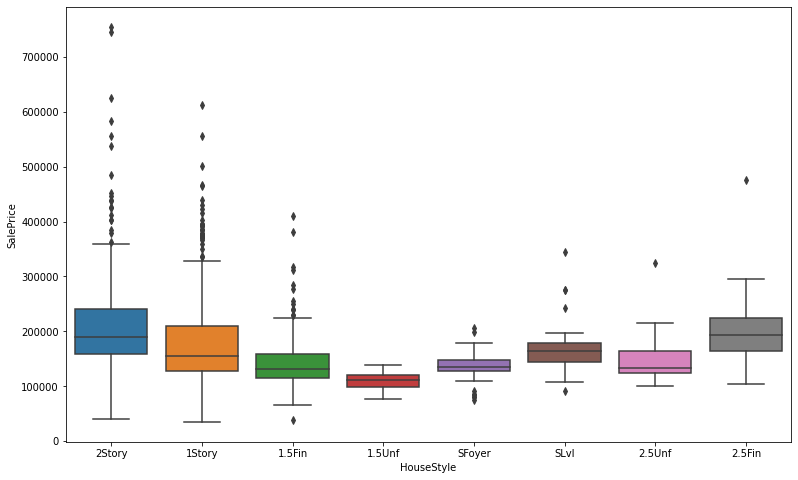

In [0]:
##Categorical Attribute - Find the correlation between HouseStyle and SalePrice

##FRom the boxplot - We can now see that Ex seems to be the more expensive option while Fa brings the prices down.
f,ax = plt.subplots(figsize=(13,8))
sns.boxplot(y=housing.SalePrice, x=housing.HouseStyle)
plt.show()

##### iii - Count-plot

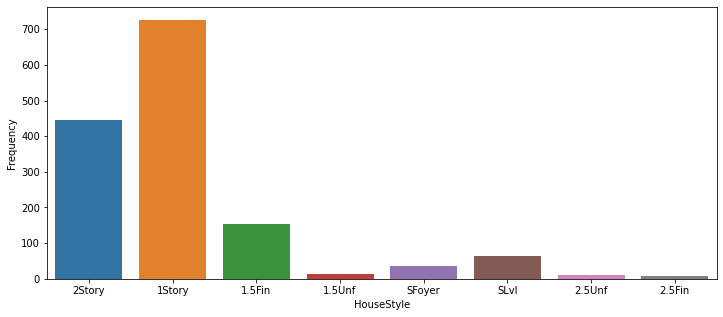

In [0]:
##Count the categories within the HouseStyle attribute

##A> Use value cunts to obtain dataframe
housing.HouseStyle.value_counts()

##B> Use the plot to visualize the frequency
fig = plt.figure(figsize=(12,5))
sns.countplot(x='HouseStyle', data= housing)
plt.ylabel('Frequency')
plt.show()



##### iv - Scatter-plot

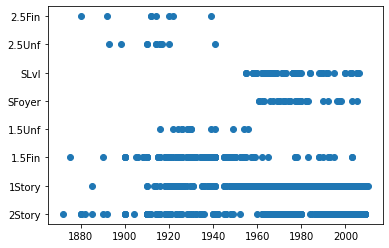

In [0]:
##Based on the scatterplot -Now we know that 2Story and 1Story have been there for ages 
## and they continue to be built while SFoyer and SLvl are relatively newer styles. 
##We can also notice that 2.5Fin, 2.5Unf and 1.5Unf are deprecated styles.

plt.scatter(housing.YearBuilt, housing.HouseStyle)

##### v - Pair-wise Correlation Matrix

In [0]:
##We ignore auto correlation - correlation of 1.0 indicate self correlation
impt_corrs = (corr[abs(corr)> 0.5][corr!=1.0]).unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), impt_corrs[key]) \
    for key in impt_corrs])), columns=['attribute pair', 'correlation'])

# Sorted by absolute value based on descending of correlation column
#unique_important_corrs = unique_important_corrs.ix[
    #abs(unique_important_corrs['correlation']).argsort()[::-1]]


unique_important_corrs 

,attribute pair,correlation
0,"(OverallQual, YearBuilt)",0.572323
1,"(2ndFlrSF, GrLivArea)",0.687501
2,"(GarageArea, SalePrice)",0.623431
3,"(GarageCars, OverallQual)",0.600671
4,"(GarageArea, GarageYrBlt)",0.564567
5,"(GarageCars, YearBuilt)",0.537850
6,"(SalePrice, TotalBsmtSF)",0.613581
7,"(GrLivArea, OverallQual)",0.593007
8,"(SalePrice, YearBuilt)",0.522897
9,"(SalePrice, YearRemodAdd)",0.507101


##**2. Data Preprocessing**: 

Prepare the data for effective data mining, like removing missing values, outliers and highly correlated fetaures.

### A. Replace Missing Values

In [0]:
##Find the sum of total missing value from each attributes - BEFORE IMPUTING
 housing.isnull().sum().sort_values(ascending = False)
 

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
MSSubClass          0
Length: 80, dtype: int64

NOTE :  The missing values can be handled in one of the three ways,

**dropna()** - get rid of the row completely having NA's.

**drop()** - drop any specific column completely containing NA's.

**fillna()** - Set the missing value to some value (mean, median,or zero, etc)
      




In [0]:
###Imputing missing value
housing_p = housing

###Replace the missing value - from Categorical column - with "NONE"
catg_col_tofill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                          'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                          'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                          'MasVnrType']

for cat in catg_col_tofill_none:
  housing_p[cat] = housing[cat].fillna("None")

###Replace the missing value of - LOTFRONTAGE - with "MEAN" of neighbourhood lotfrontage instead of all the values
housing_p['LotFrontage'] = housing_p.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

###Replace missing value - from GARAGE: GarageYrBlt, GarageArea and GarageCars - with "ZERO"
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea']:
    housing_p[col] = housing_p[col].fillna(int(0))

###Replace missing value - ELECTRICAL - with "MODE"
housing_p['Electrical'] = housing_p['Electrical'].fillna(housing_p['Electrical']).mode()[0]

###Replace missing value in UTILITIES - by REMOVING the complete column
housing_p = housing_p.drop(['Utilities'], axis = 1)

In [0]:
#####Find the sum of total missing value from each attributes - AFTER IMPUTING
housing_p.isnull().apply(sum).max()

0

### B. Handle Outliers

In [0]:
##1460 entries BEFORE data preprocessing : 
housing_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [0]:
num_attrib = housing_p.select_dtypes(exclude='object')

#we have some attribute that is above the 0.999 quantile
high_quant = housing_p.quantile(.999)

for i in num_attrib.columns:
    housing_p = housing_p.drop(housing_p[i][housing_p[i]>high_quant[i]].index)

In [0]:
##1422 entries AFTER data preprocessing : 
housing_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1422 non-null   int64  
 1   MSZoning       1422 non-null   object 
 2   LotFrontage    1422 non-null   float64
 3   LotArea        1422 non-null   int64  
 4   Street         1422 non-null   object 
 5   Alley          1422 non-null   object 
 6   LotShape       1422 non-null   object 
 7   LandContour    1422 non-null   object 
 8   LotConfig      1422 non-null   object 
 9   LandSlope      1422 non-null   object 
 10  Neighborhood   1422 non-null   object 
 11  Condition1     1422 non-null   object 
 12  Condition2     1422 non-null   object 
 13  BldgType       1422 non-null   object 
 14  HouseStyle     1422 non-null   object 
 15  OverallQual    1422 non-null   int64  
 16  OverallCond    1422 non-null   int64  
 17  YearBuilt      1422 non-null   int64  
 18  YearRemo

### C. Handle highly Correlated Attributes

In [0]:
#### Remove highly correlated features
# Remove attributes that were identified for excluding when viewing scatter plots & corr values
attributes_drop = ['MiscVal', 'MoSold', 'YrSold', 'BsmtFinSF2','BsmtHalfBath','MSSubClass',
                   'GarageArea', 'GarageYrBlt', '3SsnPorch']

housing_p = housing_p.drop(attributes_drop, axis = 1)

### D. Change categorical to numeric

 

- for example, for type of houses, we would have one attribute equal to 1 when the category is 1Story (and 0 otherwise), another attribute equal to 1 when the category is 2Story (and 0 otherwise), and so on. This is called **one-hot encoding**, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are also known as **dummy attributes**.

In [0]:
#### Transforming Cat variables
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_processed_1hot = cat_encoder.fit_transform(housing_p)
housing_processed_1hot

<1422x7333 sparse matrix of type '<class 'numpy.float64'>'
	with 99540 stored elements in Compressed Sparse Row format>

##**3. Data Transformation**: 

### A. Feature Scaling

- In order for ML to perfomr well, the numerical attributes must be made sure they are in same scale as input. In order to choose the best feature scaling method;
Standardization is much less affected by outliers. Say Bill Gates walks into a bar, suddenly the median income for people in the bar would shoot up to the moon, so min-max scaling would be a poor choice for scaling here. On the other hand, standardization would not be much affected. However, only cares about “fixing” the mean and variance, standardization does not limit values to a specific range, which may be problematic for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1).

1. Min-Max scaling - MinMaxScaler

    Xsc = (X - Xmin) / (Xmax - Xmin)

2. Standardization - StandardScaler

    Z = (x - μ) / (σ)

In [0]:
# Import modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Seperate feature (X) and target variable (Y)
housing_X = housing_p.drop("SalePrice", axis = 1)
housing_y = housing_p["SalePrice"].copy()

# Get the list of names for numerical and categorical attributes separately
num_attributes = housing_X.select_dtypes(exclude='object')
cat_attributes = housing_X.select_dtypes(include='object')

num_attribs = list(num_attributes)
cat_attribs = list(cat_attributes)

# Numerical Pipeline to impute any missing values with the median and scale attributes
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

## ColumnTransformer - single transformer handle all columns, applying the appropriate transformations to each column
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [0]:
## BEFORE applying transformation in target variable
print(housing_y.describe())

count      1422.000000
mean     178405.042897
std       74506.926127
min       35311.000000
25%      129600.000000
50%      161500.000000
75%      211750.000000
max      611657.000000
Name: SalePrice, dtype: float64


In [0]:
##Apply Log transformation to target variable - SalePrice
housing_y_prepared  = np.log(housing_y)

In [0]:
##Apply transformation to other variables - feature params
housing_X_prepared = full_pipeline.fit_transform(housing_X)

In [0]:
## AFTER applying transformation to target variable
print(housing_y_prepared.describe())

count    1422.000000
mean       12.014792
std         0.389594
min        10.471950
25%        11.772207
50%        11.992260
75%        12.263160
max        13.323927
Name: SalePrice, dtype: float64


<1422x281 sparse matrix of type '<class 'numpy.float64'>'
	with 98118 stored elements in Compressed Sparse Row format>

##**4. Machine Learning Model design**: 

### A. Create Test set and Find Accuracy

In [0]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing_X_prepared, housing_y_prepared, test_size=0.2, random_state=7)

In [0]:
##Build Linear Model
# Import modules
from sklearn.linear_model import LinearRegression

# Train the model on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on test data
print("Accuracy%:", model.score(X_test, y_test)*100)

Accuracy%: 89.54551604981935


### B. Access the Model

RMSE (Root Mean Square Error) is a typical performance measure for regression problems. It gives an idea of how much error the system typically makes in its predictions.

The equation for RMSE --> sum the square of all the errors between predicted values and actual values, we divide by the total number of test examples and then we take the square root of the results:




In [0]:
##we took the log of our target variable, SalePrice. This means that before evaluating RMSE,
## we need to convert prices back to their original values.
## Inverse of the log means to simply take the exponential of the log values, i.e., we will simply call np.exp()


# Invert the log-transformed value
def inv_y(transformed_y):
    return np.exp(transformed_y)


In [0]:
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import xgboost


# Series to collect RMSE for the different algorithms: "algorithm name + rmse"
rmse_compare = pd.Series()
rmse_compare.index.name = 'Model'

# Series to collect accuracy scores for the different algorithms: "algorithm name + score"
scores_compare = pd.Series()
scores_compare.index.name = 'Model'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [0]:
# Model 1: Linear Regression =================================================
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_val_predictions = linear_model.predict(X_test)
linear_val_rmse = mean_squared_error(inv_y(linear_val_predictions), inv_y(y_test))
linear_val_rmse = np.sqrt(linear_val_rmse)
rmse_compare['LinearRegression'] = linear_val_rmse

lr_score = linear_model.score(X_test, y_test)*100
scores_compare['LinearRegression'] = lr_score

# Model 2: Decision Trees. Define the model. =============================
dtree_model = DecisionTreeRegressor(random_state=5)
dtree_model.fit(X_train, y_train)

dtree_val_predictions = dtree_model.predict(X_test)
dtree_val_rmse = mean_squared_error(inv_y(dtree_val_predictions), inv_y(y_test))
dtree_val_rmse = np.sqrt(dtree_val_rmse)
rmse_compare['DecisionTree'] = dtree_val_rmse

dtree_score = dtree_model.score(X_test, y_test)*100
scores_compare['DecisionTree'] = dtree_score

# Model 3: Random Forest. Define the model. =============================
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(X_train, y_train)

rf_val_predictions = rf_model.predict(X_test)
rf_val_rmse = mean_squared_error(inv_y(rf_val_predictions), inv_y(y_test))
rf_val_rmse = np.sqrt(rf_val_rmse)
rmse_compare['RandomForest'] = rf_val_rmse

rf_score = rf_model.score(X_test, y_test)*100
scores_compare['RandomForest'] = rf_score

# Model 4: Gradient Boosting Regression ==========================================
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=5)
gbr_model.fit(X_train, y_train)

gbr_val_predictions = gbr_model.predict(X_test)
gbr_val_rmse = mean_squared_error(inv_y(gbr_val_predictions), inv_y(y_test))
gbr_val_rmse = np.sqrt(gbr_val_rmse)
rmse_compare['GradientBoosting'] = gbr_val_rmse

gbr_score = gbr_model.score(X_test, y_test)*100
scores_compare['GradientBoosting'] = gbr_score

In [0]:
print('RMSE values for different algorithms:')
rmse_compare.sort_values(ascending=True).round()

RMSE values for different algorithms:


Model
LinearRegression    24663.0
GradientBoosting    27212.0
RandomForest        30225.0
DecisionTree        37872.0
dtype: float64

In [0]:
print('Accuracy scores for different algorithms:')
scores_compare.sort_values(ascending = False).round(3)

Accuracy scores for different algorithms:


Model
GradientBoosting    89.567
LinearRegression    89.546
RandomForest        86.332
DecisionTree        72.805
dtype: float64

### C. Fine Tune a Model


1. GridSearch : Fiddle with all the possible values manually and then compare results to find the best combination of hyperparameters

2. Randomized Search : The grid search approach is acceptable when we are exploring relatively few combinations, but when the number of combinations of the hyperparameters is large, it is often preferable to use RandomizedSearchCV. This is similar to GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations at every iteration.

3. Ensemble Methods : Try to combine the models that perform best. The group, or ensemble, will often perform better than the best individual model,

In [0]:
##Find the best HYPERPARAMETER - for RANDOM FOREST model and check if there is improvement in accuracy
from sklearn.model_selection import GridSearchCV

# Define the parameters for exploration
param_grid = [
    {'n_estimators': [10, 50, 100, 150], 'max_features': [10, 20, 30, 40, 50, 100, 150]},
    {'bootstrap': [False], 'n_estimators': [10, 50, 100, 150], 'max_features': [10, 20, 30, 40, 50, 100, 150]},
  ]

# The model for which we are finding params values
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [0]:
# Best values
grid_search.best_params_

# Model with best values
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=40, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
##Evaluate using the param
rf_model_final = RandomForestRegressor(bootstrap=False,max_features=50, n_estimators=150, random_state=5)

rf_model_final.fit(X_train, y_train)
rf_final_val_predictions = rf_model_final.predict(X_test)

# Get RMSE 
rf_final_val_rmse = mean_squared_error(inv_y(rf_final_val_predictions), inv_y(y_test))
np.sqrt(rf_final_val_rmse)

# Get Accuracy
rf_model_final.score(X_test, y_test)*100

87.81704897477596

The accuracy using RandomForest has gone up from about 84.8 to 87.8 while the RMSE has decreased from 31491 to 28801